In [1]:
import os
import sys
import pandas as pd
import geopandas 
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

C:\Users\USUARIO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dir = os.getcwd()
print(dir)
data_dir='C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\SHP\\'
#os.listdir(data_dir)

C:\Users\USUARIO\Documents\trabajo_Grado\script


# **CONTEXTO DE DIMENSION FRACTAL**

<p><img alt="Via con grilla" src="img/via_grid.png" /></p>

# CARGA DE LOS DATOS

In [3]:
#df_propiedades= geopandas.read_file(data_dir + '\PROPIEDADES_4326.shp')
#df_propiedades= geopandas.read_file(data_dir + '\GUADALUPE\guadalupe.shp')
#df_propiedades= geopandas.read_file(data_dir + '\DUITAMA\duitama.shp')
df_propiedades= geopandas.read_file(data_dir + '\PROPIEDADES\\PROPIEDADES_PEND\PROPIEDADES.shp')

In [4]:
df_propiedades.head(2)

,CODIGOVIA,FECHA,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,OBS,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,geometry
0,MC10678,2017-10-18,578.064026,-0.92,2.0,0.0,0.0,0.0,None,4,2,2,1,577.975811,0.887881,"LINESTRING Z (-73.07081 5.81932 2547.67800, -7..."
1,MC10691,2017-10-18,278.463989,7.82,2.3,0.0,0.0,0.0,None,3,1,4,1,278.417354,1.011417,"LINESTRING Z (-73.02610 5.86937 2866.58490, -7..."


# EDA - Analsisi Exploratorio de Datos

## Tipo de datos

In [23]:
df_propiedades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 141335 entries, 0 to 141334
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   CODIGOVIA   141335 non-null  object  
 1   FECHA       141335 non-null  object  
 2   LONGITUD    141335 non-null  float64 
 3   PENDIENTE   141335 non-null  float64 
 4   ANCHOCARR   141335 non-null  float64 
 5   ANCHOBERMA  141335 non-null  float64 
 6   ANCHOCUNET  141335 non-null  float64 
 7   ANCHOSEPAR  141335 non-null  float64 
 8   OBS         136759 non-null  object  
 9   TIPOTERR    141335 non-null  int64   
 10  TIPOSUPERF  141335 non-null  int64   
 11  ESTADO      141335 non-null  int64   
 12  NUMCARR     141335 non-null  int64   
 13  Shape_Leng  141335 non-null  float64 
 14  mink_dem    141304 non-null  float64 
 15  geometry    141335 non-null  geometry
dtypes: float64(8), geometry(1), int64(4), object(3)
memory usage: 17.3+ MB


Las variables contextuales se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):


|  Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | CODIGOVIA          |  Texto de 4 a 15 caracteres  |SI|
 | FECHA    |  Texto de 10 caracteres en formato: AAAA-MM-DD  |SI|
 | OBS  | Texto de 10 a 250 caracteres   |NO|
 

Las variables cuantitativas de interes se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):

 |  Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | LONGITUD          |  Número entre 1 y 25000  |SI|
 | PENDIENTE    |  Número entre -45 y 45    |SI|
 | NUMCARR  | Número entre 1 y 6   |SI|
 | ANCHOCARR  | Número entre 1,5 y 5    |SI|
 | ANCHOBARMA  | Número entre 0,4 y 6   |NO|
 | ANCHOCUNET  | Número entre 0,1 y 4   |NO|
 | ANCHOSEPAR  | Texto de 10 a 250 caracteres   |NO|
 


Las variables categoricas de interes se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):

 | Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | TIPOTERR          |  Número entre 1 y 4 en donde: 1 = Escarpado, 2 = Montañoso, 3 = Ondulado, 4 = Plano |SI|
 | TIPOSUPERF    |  Número entre 1 y 8 en donde: 1 = Destapado, 2 = Afirmado, 3 = Pavimento asfáltico, 4 = Tratamiento superficial, 5 = Pavimento rígido, 6 = Placa huella, 7 = Pavimento articulado, 8 = Otro  |SI|
 | ESTADO  | Número entre 1 y 5 en donde: 1 = Bueno, 2 = Regular, 3 = Malo, 4 = Pésimo, 5 = Intransitable   |SI|
 

## Valores Nulos, Cero y Fuera de rango

In [5]:
# Datos con longitud 0
a = len(df_propiedades[df_propiedades.LONGITUD == 0])
an= len(df_propiedades[df_propiedades.LONGITUD.isna()])

# Datos con pendiente diferente uera de rango (-45 ,45) grados
b = len(df_propiedades[np.abs(df_propiedades.PENDIENTE) > 45])
bn= len(df_propiedades[df_propiedades.PENDIENTE.isna()])

# Datos de ancho 
c = len(df_propiedades[df_propiedades.ANCHOCARR <1.5])
cn= len(df_propiedades[df_propiedades.ANCHOCARR.isna()])
d = len(df_propiedades[df_propiedades.ANCHOBERMA ==0])
dn= len(df_propiedades[df_propiedades.ANCHOBERMA.isna()])
e = len(df_propiedades[df_propiedades.ANCHOCUNET ==0])
en= len(df_propiedades[df_propiedades.ANCHOCUNET.isna()])
f = len(df_propiedades[df_propiedades.ANCHOSEPAR ==0])
fn= len(df_propiedades[df_propiedades.ANCHOSEPAR.isna()])

# Datos furea de Dominio 
g = len(df_propiedades[~df_propiedades.TIPOTERR.isin([1,2,3,4])])
gn= len(df_propiedades[df_propiedades.TIPOTERR.isna()])
h = len(df_propiedades[~df_propiedades.TIPOSUPERF.isin([1,2,3,4,5,6,7,8])])
hn= len(df_propiedades[df_propiedades.TIPOSUPERF.isna()])
i = len(df_propiedades[~df_propiedades.ESTADO.isin([1,2,3,4,5])])
i_n= len(df_propiedades[df_propiedades.ESTADO.isna()])
j = len(df_propiedades[~df_propiedades.NUMCARR.isin([1,2,3,4,5,6])])
jn= len(df_propiedades[df_propiedades.NUMCARR.isna()])


# Datos con longitud 0
k = len(df_propiedades[df_propiedades.Shape_Leng == 0])
kn= len(df_propiedades[df_propiedades.Shape_Leng.isna()])

## DIM FRACTAL!!!
l = len(df_propiedades[df_propiedades.mink_dem == 0])
ln= len(df_propiedades[df_propiedades.mink_dem.isna()])


t=a+an+b+bn+c+cn+d+dn+e+en+f+fn+g+gn+h+hn+i+i_n+j+jn+k+kn+  l+ln

print("los valores inconsistentes de las variables esn estudio son:\n"
      "    Longitud - [LONGITU] :" + str(a+an) + "\n"
      "    Pendiente - [PENDIENTE] :" + str(b+bn) + "\n"
      "    Ancho Carril - [ANCHOCARR] :" + str(c+cn) + "\n"
      "    Ancho Berma - [ANCHOBERRMA] :" + str(d+dn) + "\n"
      "    Ancho Cuneta - [ANCHOCUNET] :" + str(e+en) + "\n"
      "    Ancho Separador - [ANCHOCEPAR] :" + str(f+fn) + "\n"
      "    Tipo de Terreno - [TIPOTERR] :" + str(g+gn) + "\n"
      "    Tipo de Superficie - [TIPOSUPERF] :" + str(h+hn) + "\n"
      "    Estado - [ESTADO] :" + str(i+i_n) + "\n"
      "    Numero de carriles - [NUMCARR] :" + str(j+jn) + "\n"
      "    Longitud - [Shape_Leng] :" + str(k+kn) + "\n"
      "    Dimension Fractal - [mink_dem] :" + str(l+ln) + "\n"
      "    TOTAL :" + str(t) 
     )

##FALTA AQUI LA DIM FRACTAL!!!


los valores inconsistentes de las variables esn estudio son:
    Longitud - [LONGITU] :1
    Pendiente - [PENDIENTE] :0
    Ancho Carril - [ANCHOCARR] :2
    Ancho Berma - [ANCHOBERRMA] :140725
    Ancho Cuneta - [ANCHOCUNET] :91626
    Ancho Separador - [ANCHOCEPAR] :141176
    Tipo de Terreno - [TIPOTERR] :1
    Tipo de Superficie - [TIPOSUPERF] :0
    Estado - [ESTADO] :0
    Numero de carriles - [NUMCARR] :1
    Longitud - [Shape_Leng] :0
    Dimension Fractal - [mink_dem] :31
    TOTAL :373563


Existen variables par los que los valores cero representan la ausencia de la caracteristica. Estos registros no cumplen con los el dominio de la resolucion del SINC.
Cara reslatar que los valores de Ancho a excepcion de ACNCHOCARR no obligatorios de tal forma que debido a su magnitud de datos cero  / nulos se evaluara su pertinencia.


# Estadisticas Descriptivas

In [6]:
df_propiedades['ABS_PENDIENTE'] = np.abs(round(df_propiedades['PENDIENTE']))
df_propiedades.describe()

,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE
count,141335.000000,141335.00000,141335.000000,141335.000000,141335.000000,141335.000000,141335.000000,141335.000000,141335.000000,141335.000000,141335.000000,141304.000000,141335.000000
mean,93.541388,0.57424,2.747082,0.005618,0.285611,0.000315,2.419415,2.083985,2.382078,1.219535,92.059429,0.963119,5.173885
std,242.167238,7.13303,0.609058,0.099171,0.455787,0.017740,1.288051,0.981450,0.836612,0.415060,229.616903,0.057882,4.950339
min,0.000000,-43.81000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.137103,0.824181,0.000000
25%,24.300000,-3.19000,2.200000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,23.963327,0.922977,1.000000
50%,50.382306,0.32000,2.800000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,49.992928,0.977716,4.000000
75%,98.993944,4.53000,3.200000,0.000000,0.600000,0.000000,4.000000,2.000000,3.000000,1.000000,98.205620,1.004086,7.000000
max,17257.591313,45.00000,7.300000,4.000000,4.000000,2.300000,4.000000,8.000000,5.000000,6.000000,16773.952835,1.338025,45.000000


# Correlacion de variables

<AxesSubplot:>

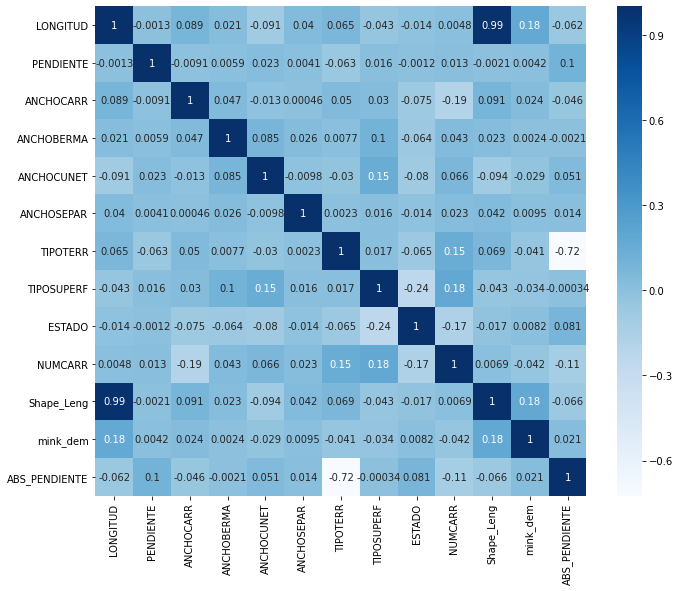

In [7]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_propiedades.corr(), annot=True, cmap="Blues")

# Observaciones sobre los datos


- Las variables LONGITUD y Shape_Leng hacen referencia a la misma informacion por tanto solo se tiene en cuenta el campo Shape_Leng
- El signo de la pendiente es relativo al sentido de circulacion de la via y al eje local de coordenadas para el cual se toma la magnitud, por tanto se plantea tomar como nueva variable derivada el __Valor Absoluto de la pendiente__.
- Para la variable ANCHOCARR los valores representativos deberan no solo ser mayores a Cero, para una consistencia logica sino que deberan considerar por lo menos una distancia que permita la circulacion de un vehiculo pequeño por tanto el valor minimo de carril a tener en cuenta es de 1.5 m.
- Segun el dominio de la variable TIPOTERR se puede presumir una correlacion con la variable pendiente ya que los tipos de terreno se asocian con la geomorfologia y esta a su vez con la variación de pendientes del terreno.
- El numero de carriles se considera una variable subjetiva dependiente del personal que registra el valor en campo. La mayoria de vias terciarias tendran circulacion en ambos sentidos ya que localmente no existe oferta adicional para cubrir los origenes y destinos comunes. De otra manera la medida del ancho de la infraestructura aporta mayor informacion excluyendo el sesgo al considerar subjetivamente una ciarta cantidad de carriles.
- Variables con cantidades marginales de datos frente a la disponibilidad informacion de las demas variables (ANCHOVERMA, ANCHOCUNET, ANCHOSEPAR). Estas variables coinciden con la caracteristica "no obligatoria" de la normatividad




# Limpieza de los datos

Segun las observaciones de los datos se eliminan del analisis las variables contextuales ya que no aportan datos relevantes para la clasificacion propuesta
Por otro lado, siguiendo las observaciones sobre los datos se procede a la limpieza relacionada con datos nulos o valores Cero (los casos particulares de las variables:ANCHOVERMA, ANCHOCUNET, ANCHOSEPAR, se evaluara con la representatividad y varianza en el siguente titulo)

In [9]:
df = df_propiedades.dropna(subset=['PENDIENTE','ANCHOCARR','TIPOTERR','TIPOSUPERF','ESTADO','NUMCARR','Shape_Leng','mink_dem' ])

df=df[(df.Shape_Leng != 0)]
df=df[np.abs(df.PENDIENTE) <= 45]
df=df[df.ANCHOCARR >=1.5]
df=df[df.TIPOTERR.isin([1,2,3,4])]
df=df[df.TIPOSUPERF.isin([1,2,3,4,5,6,7,8])]
df=df[df.ESTADO.isin([1,2,3,4,5])]
df=df[df.ESTADO.isin([1,2,3,4,5,6])]
## DIM FRACTAL!!!
df_propiedades=df[df.mink_dem >0]

print(len(df_propiedades))

141301


# Cantidad de datos representativos - Datos con varianza cercana a Cero

Del analisis de las estadisticas descriptivas resaltan los vaores minimos y de cuartiles de las variables: ANCHOBERMA, ANCHOCUNET y ANCHOSEPAR, ya que en su mayoria son "Cero". Para verificar los aportes de datos representativos apara el analisis se obtienen las proporciones de valores por encima del minimo.

In [10]:
l=len(df_propiedades)
b=len(df_propiedades[df_propiedades.ANCHOBERMA >0])
c=len(df_propiedades[df_propiedades.ANCHOCUNET >0])
d=len(df_propiedades[df_propiedades.ANCHOSEPAR >0])

print( ' ANCHOBERMA: {}%'.format(round(b*100/l,2))+'\n', 'ANCHOCUNET: {}%'.format(round(c*100/l,2))+'\n', 'ANCHOSEPAR: {}%'.format(round(d*100/l,2)))

 ANCHOBERMA: 0.43%
 ANCHOCUNET: 35.17%
 ANCHOSEPAR: 0.11%


- Las variables ANCHO BERMA y ANCHOSEPAR cuantan con proporciones marginales de datos diferentes a cero por tanto no se tendran en cuanta.
- la variable ANCHOCUNET cuenta con una proporcion de datos diferentes a Cero igual a 35% de tal forma que puede ser relvante para el analsiis, sin embargo, se advierte un posible desvalance entre los valores de la variable que pueda distorcionar los datos.

NO es conveniente incluir variables que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia.
Se establece un umbral para la varianza por debajo del cual las variables seran desechadas, en este caso el umbrar toma el valor de 0.25


In [11]:
df_propiedades['ABS_PENDIENTE'] = np.abs(df_propiedades['PENDIENTE'])

### FILTRO DE VARIABLES NO OBJECT y GEOEMTRY

filtro = df_propiedades.select_dtypes(exclude=['object','geometry'])

#Aplicacion del umbral de varianza /// https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.25)
X_high_variance = thresholder.fit_transform(filtro)

#Variables con varianza cercana a cero e inferior al umbral
low_var = [column for column in filtro.columns if column not in filtro.columns[thresholder.get_support()]]
print('low_var: ',low_var)
#Variables con varianza superior al umbral
high_var = [column for column in filtro.columns if column in filtro.columns[thresholder.get_support()]]
print('high_var: ',high_var)

low_var:  ['ANCHOBERMA', 'ANCHOCUNET', 'ANCHOSEPAR', 'NUMCARR', 'mink_dem']
high_var:  ['LONGITUD', 'PENDIENTE', 'ANCHOCARR', 'TIPOTERR', 'TIPOSUPERF', 'ESTADO', 'Shape_Leng', 'ABS_PENDIENTE']


Se comprueva entonces que las variavles ANCHOBERMA, ANCHOCUNET y ANCHOSEPAR no cuentan con caracteristicas faborables para ser empleadas dentro del modelo de agrupamiento adicionalmente las variables ANCHOCARR y NUMCARR tampoco seran tenidas en cuenta.

## Correlacion Pendiente - Tipo Terrerno

Como sugeria el mapa de calor de correlaciones y se verifica con las siguientes graficas, existe una clara relacion entre la pendiente (en este caso en valor absoluto) y la clasificacion cualitativa de tipo de terreno. Pendientes altas corresponderan a terrenos escarpados (1) y pendientes bajas corresponderan a terrenos planos(4). Por tanto para efectos del estudio resulta conveniente seleccionar solo una de las variables, entendiendo que se busca implementar una agrupamiento se selecciona la variable continua ABS_PENDIENTE ya que aporta mayor cantidad de informacion. 

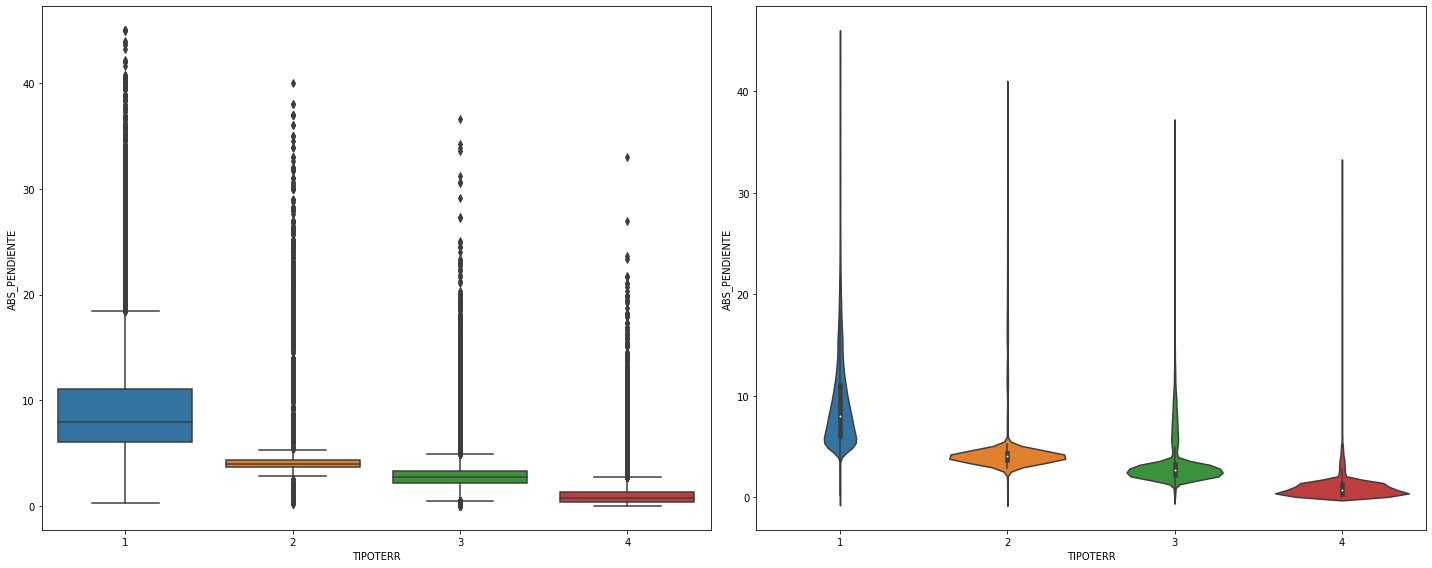

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data = df_propiedades, x= "TIPOTERR" , y = "ABS_PENDIENTE", ax=ax[0])
sns.violinplot(data = df_propiedades, x= "TIPOTERR" , y = "ABS_PENDIENTE", ax=ax[1])
fig.tight_layout()

# Comportamiento de las variables Categoricas

<AxesSubplot:xlabel='ESTADO', ylabel='mink_dem'>

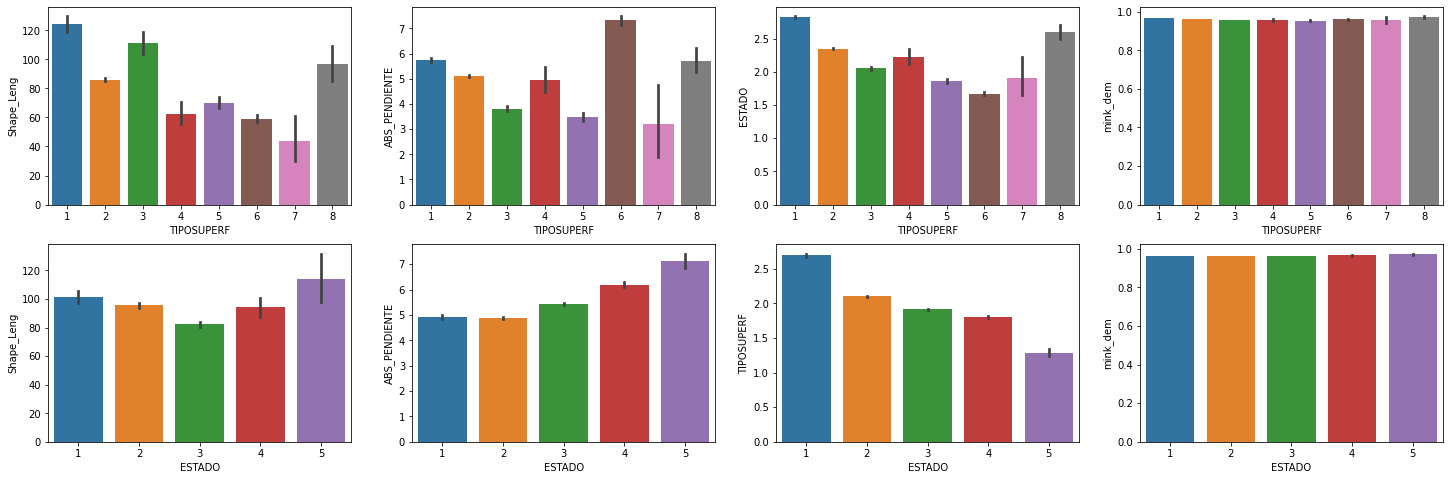

In [14]:
# Comportamiento de las variables Categoricas
fig,ax=plt.subplots(2,4,figsize=(25,8))
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='Shape_Leng', ax=ax[0,0])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='ABS_PENDIENTE', ax=ax[0,1])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='ESTADO', ax=ax[0,2])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='mink_dem', ax=ax[0,3])

sns.barplot(data = df_propiedades,x='ESTADO', y='Shape_Leng', ax=ax[1,0])
sns.barplot(data = df_propiedades,x='ESTADO', y='ABS_PENDIENTE', ax=ax[1,1])
sns.barplot(data = df_propiedades,x='ESTADO', y='TIPOSUPERF', ax=ax[1,2])
sns.barplot(data = df_propiedades,x='ESTADO', y='mink_dem', ax=ax[1,3])

Las variables categoricas que no resultan excluidas por los primeros analsis no presentan tendencias marcadas en terminos de correlaciones entre sus categorias

## Variables Seleccionadas

Dentro de las variables del modelo de datos para la capa PROPIEDADES del SINC encontramos variables numericas continuas y categóricas cuya utilidad fue evaluada en el analisis exploratorio de los datos y su porterior limpieaza, de tal modo que solo se tomaran en cuenta variables continuas: Longitud, Pendiente, y ***dimension fractal***. A su vez Las variables categoricas seran: Tipo de superficie y Estado.


In [14]:
#lista de las variables Seleccionadas en el dataframe Propiedades

#df = df_propiedades[['Shape_Leng','ABS_PENDIENTE','mink_dem','TIPOSUPERF', 'ESTADO']]

##BORRAR


# Transformacion YEO JOHNSON

PowerTransformer(standardize=False)
[0.04233063 0.03319385 2.27159179]
['ABS_PENDIENTE' 'Shape_Leng' 'mink_dem']
0.8478099353929092
1.2929972534882437
0.13622740354196328


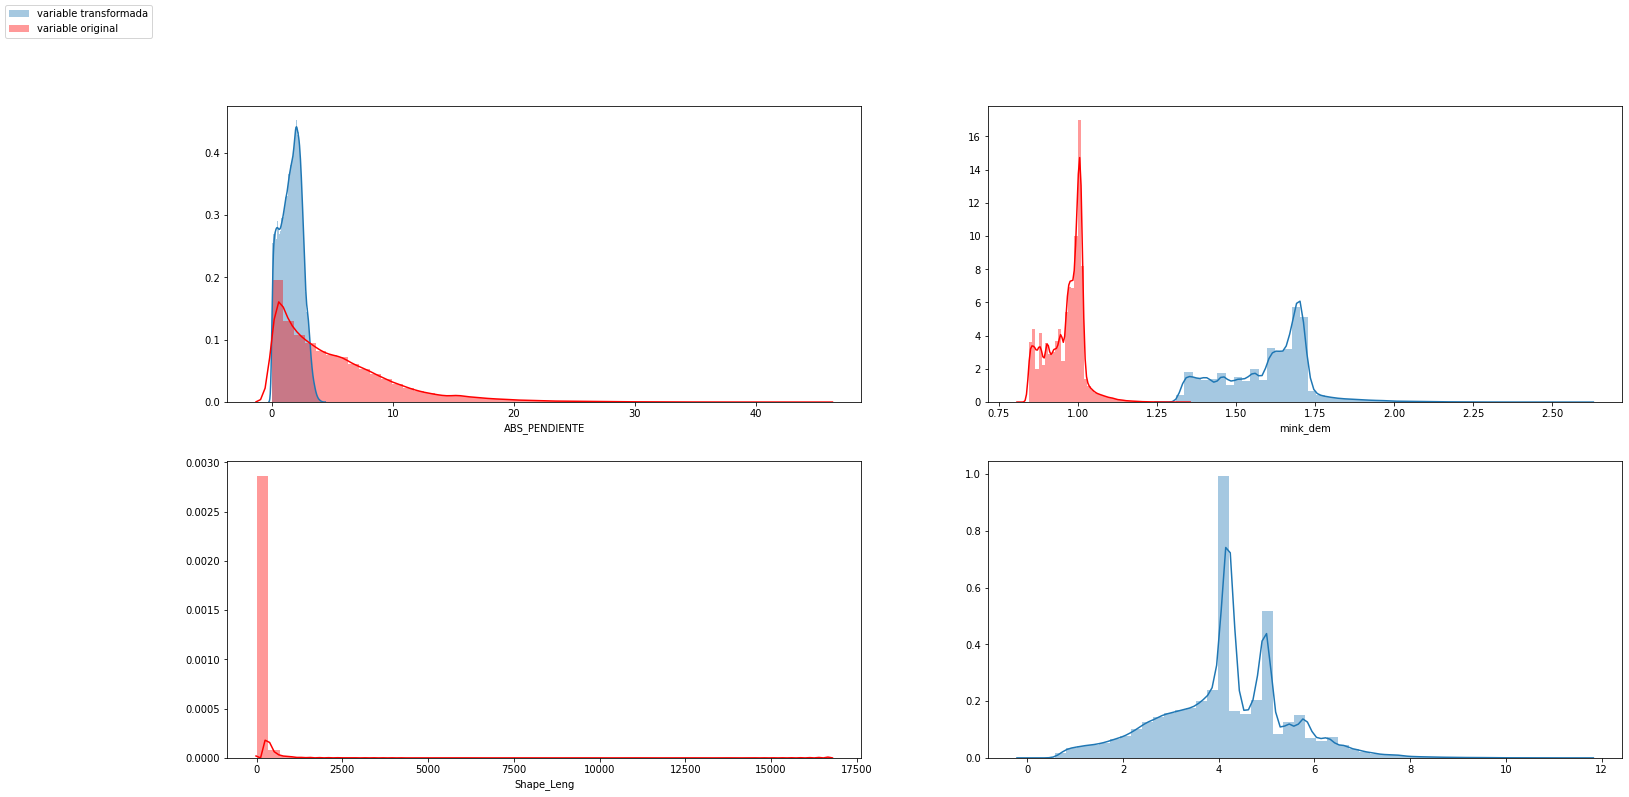

In [16]:
## TRANSFFORMACION YEO JOHNSON //  https://machinelearningmastery.com/power-transforms-with-scikit-learn/

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
d=df_propiedades[['ABS_PENDIENTE','Shape_Leng','mink_dem']]
print(pt.fit(d))

print(pt.lambdas_) # parametros de la transformacion
print(pt.feature_names_in_) # columnas transformadas
i = pt.transform(d)
#print(i)

print(pt.transform(d)[:,0].std())
print(pt.transform(d)[:,1].std())
print(pt.transform(d)[:,2].std())


fig,ax=plt.subplots(2,2,figsize=(25,12))

sns.distplot(pt.transform(d)[:,0],ax=ax[0,0])
sns.distplot(df_propiedades.ABS_PENDIENTE,ax=ax[0,0], color ='r')
sns.distplot(df_propiedades.Shape_Leng,ax=ax[1,0], color ='r')
sns.distplot(pt.transform(d)[:,1],ax=ax[1,1])
sns.distplot(pt.transform(d)[:,2],ax=ax[0,1])
sns.distplot(df_propiedades.mink_dem,ax=ax[0,1], color ='r')
fig.legend(labels=['variable transformada','variable original'],loc='upper left')


- La variable ABS_PENDIENTE ve reducida su varianza al aplicarle la transformacion de Yeo Johnson y su forma original no se ve afactafa salvo escala, por tanto no se considera modificar las informacion original.
- La variable Shape_Leng mejora en el centrado de susdatos y reduciendo su rango
- la variable de dimension fractal no se ve afectada significativamente  tanto en forma, escala y varianza los cambios son minimos sin embargo su meia se desplaza a la izquierda sin mayor efecto con respecto a las medidas de dispersion. Considerando lo anterior no se considera modificar las informacion original.

In [17]:
df_propiedades = df_propiedades.assign(yj_Shape_Leng= i[:,1])
#df_propiedades = df_propiedades.assign(yj_ABS_PENDIENTE= i[:,0])
#df_propiedades = df_propiedades.assign(yj_mink_dem= i[:,2])

# Analisi de Outliers

<AxesSubplot:ylabel='mink_dem'>

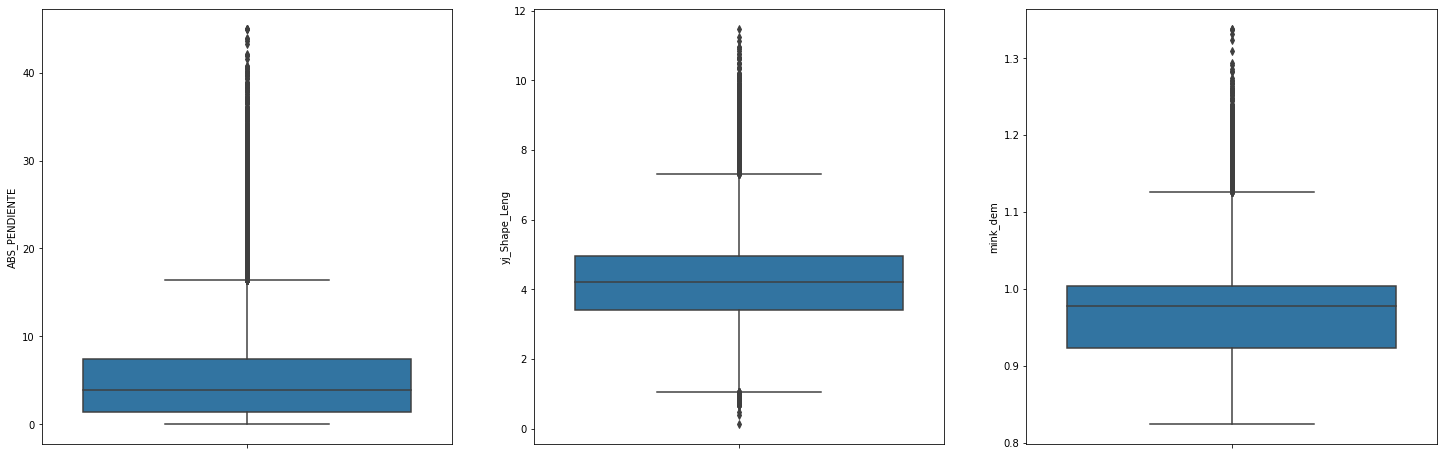

In [18]:
fig,ax=plt.subplots(1,3,figsize=(25,8))
#(df[df.Shape_Leng >0])

sns.boxplot(data = df_propiedades,y ='ABS_PENDIENTE', ax=ax[0])
sns.boxplot(data = df_propiedades,y ='yj_Shape_Leng', ax=ax[1])
sns.boxplot(data = df_propiedades,y ='mink_dem', ax=ax[2])


#sns.violinplot(data = l,y ='yj_mink_dem', ax=ax[3])
#sns.scatterplot(data= df , x='yj_ABS_PENDIENTE' ,y='yj_Shape_Leng')
#sns.scatterplot(data= df , x='yj_mink_dem' ,y='yj_Shape_Leng')

# en caso de eliminar ---FALTA!!

In [20]:
# calculate interquartile range // https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
l=df_propiedades.ABS_PENDIENTE

q25, q75 = np.percentile(l, 25), np.percentile(l, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in l if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in l if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print('{}%'.format(round((len(outliers)*100/len(outliers_removed)),5)))

#outliers

Percentiles: 25th=1.440, 75th=7.430, IQR=5.990
Identified outliers: 5179
Non-outlier observations: 136122
3.80468%


In [19]:
#df_propiedades.loc[df_propiedades['ABS_PENDIENTE'].isin(outliers)]

# en caso de remplazar con limites superiores o inferiores

In [21]:
#//https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_iqr(dataframe,cols, th1=0.25, th3=0.75, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace: 
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)

q = pd.DataFrame(df_propiedades.select_dtypes(exclude=['object','geometry']))
type(q)    

replace_with_thresholds_iqr(q, q.columns)

Removing Outliers using IQR
=======================  ==========  =======  =============  =============  =============
Outliers (Previously)    Outliers      Count  Column           Lower Limit    Upper Limit
=======================  ==========  =======  =============  =============  =============
True                     True          10776  LONGITUD             -87.713        211.024
True                     True           6356  PENDIENTE             -14.77          16.11
True                     True            652  ANCHOCARR                0.7            4.7
True                     True            610  ANCHOBERMA                 0              0
True                     True           2944  ANCHOCUNET              -0.9            1.5
True                     True            159  ANCHOSEPAR                 0              0
False                    False                TIPOTERR                -3.5            8.5
True                     True          36456  TIPOSUPERF                

In [19]:
from mpl_toolkits.mplot3d import Axes3D

x = df_propiedades['yj_Shape_Leng']
y = df_propiedades['ABS_PENDIENTE']
z = df_propiedades['mink_dem']
w = df_propiedades['TIPOSUPERF']
v = df_propiedades['ESTADO']

fig = px.scatter_3d(x=y, y=x, z=z,color=w.astype(str),opacity= 0.8,
                    labels={
                     "x": "yj_Shape_Leng",
                     "y": "ABS_PENDIENTE",
                     "z": "mink_dem",
                     "color": "TIPOSUPERF"})

fig.update_layout(scene = dict(xaxis = dict(autorange="reversed")))

fig.show()

fig = px.scatter_3d(x=y, y=x, z=z,color=v.astype(str),opacity= 0.8,
                    labels={
                     "x": "yj_Shape_Leng",
                     "y": "ABS_PENDIENTE",
                     "z": "mink_dem",
                     "color": "ESTADO"})

fig.update_layout(scene = dict(xaxis = dict(autorange="reversed")))

fig.show()


In [72]:
#static 3d Plot
"""fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')

ax.set_xlabel("yj_Shape_Leng")
ax.set_ylabel("ABS_PENDIENTE")
ax.set_zlabel("mink_dem")

sc = ax.scatter(x, y, z, s=40, c=w, marker='o', cmap='RdYlBu_r', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')

ax.set_xlabel("yj_Shape_Leng")
ax.set_ylabel("ABS_PENDIENTE")
ax.set_zlabel("mink_dem")

sc = ax.scatter(x, y, z, s=40, c=v, marker='o', cmap='RdYlBu_r', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

fig.show()
"""

'fig = plt.figure(figsize = (10, 8))\nax = fig.gca(projection=\'3d\')\n\nax.set_xlabel("yj_Shape_Leng")\nax.set_ylabel("ABS_PENDIENTE")\nax.set_zlabel("mink_dem")\n\nsc = ax.scatter(x, y, z, s=40, c=w, marker=\'o\', cmap=\'RdYlBu_r\', alpha=1)\nplt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)\n\n\nfig = plt.figure(figsize = (10, 8))\nax = fig.gca(projection=\'3d\')\n\nax.set_xlabel("yj_Shape_Leng")\nax.set_ylabel("ABS_PENDIENTE")\nax.set_zlabel("mink_dem")\n\nsc = ax.scatter(x, y, z, s=40, c=v, marker=\'o\', cmap=\'RdYlBu_r\', alpha=1)\nplt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)\n\nfig.show()\n'

<AxesSubplot:xlabel='ABS_PENDIENTE', ylabel='mink_dem'>

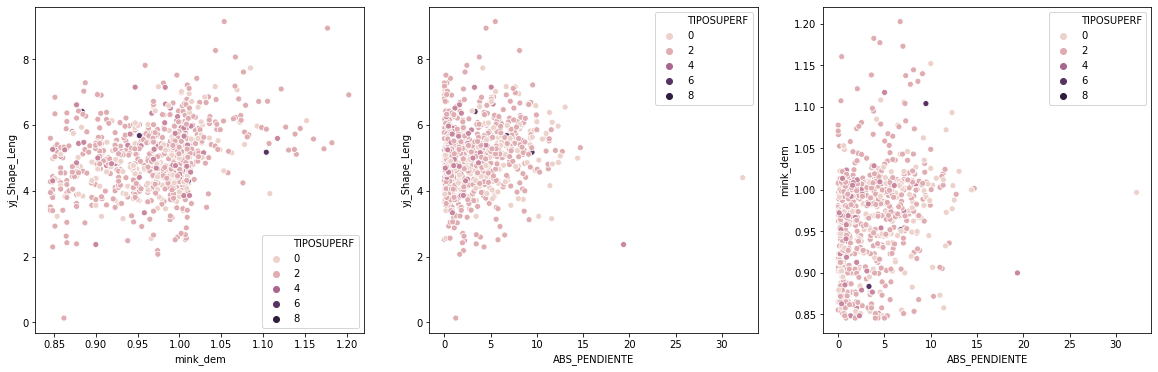

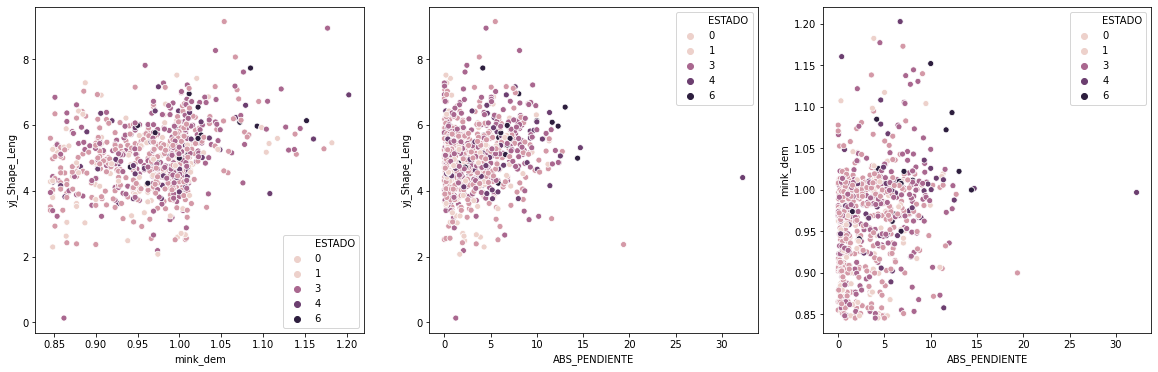

In [20]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(data= df_propiedades, x ='mink_dem', y ='yj_Shape_Leng', hue = 'TIPOSUPERF',ax=ax[0],  cmap='RdBu')
sns.scatterplot(data= df_propiedades, x ='ABS_PENDIENTE', y ='yj_Shape_Leng', hue = 'TIPOSUPERF',ax=ax[1], cmap='RdYlBu_r')
sns.scatterplot(data= df_propiedades, x ='ABS_PENDIENTE', y ='mink_dem', hue = 'TIPOSUPERF',ax=ax[2])

fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(data= df_propiedades, x ='mink_dem', y ='yj_Shape_Leng', hue = 'ESTADO',ax=ax[0], cmap='RdYlBu_r')
sns.scatterplot(data= df_propiedades, x ='ABS_PENDIENTE', y ='yj_Shape_Leng', hue = 'ESTADO',ax=ax[1], cmap='RdYlBu_r')
sns.scatterplot(data= df_propiedades, x ='ABS_PENDIENTE', y ='mink_dem', hue = 'ESTADO',ax=ax[2])

In [22]:
df_propiedades.describe()

,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng
count,141301.000000,141301.000000,141301.000000,141301.000000,141301.000000,141301.000000,141301.00000,141301.000000,141301.000000,141301.000000,141301.000000,141301.000000,141301.000000,141301.000000
mean,93.543838,0.573960,2.747141,0.005619,0.285618,0.000315,2.41948,2.083963,2.382071,1.219553,92.056627,0.963118,5.184701,4.136460
std,242.149134,7.132336,0.608948,0.099183,0.455801,0.017742,1.28805,0.981434,0.836593,0.415055,229.589424,0.057882,4.931363,1.293002
min,1.000000,-43.810000,1.500000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.137103,0.824181,0.000000,0.128758
25%,24.313493,-3.190000,2.200000,0.000000,0.000000,0.000000,1.00000,2.000000,2.000000,1.000000,23.977355,0.922977,1.440000,3.396123
50%,50.382878,0.320000,2.800000,0.000000,0.000000,0.000000,3.00000,2.000000,2.000000,1.000000,49.992935,0.977716,3.880000,4.199780
75%,98.997819,4.530000,3.200000,0.000000,0.600000,0.000000,4.00000,2.000000,3.000000,1.000000,98.208556,1.004086,7.430000,4.966536
max,17257.591313,45.000000,7.300000,4.000000,4.000000,2.300000,4.00000,8.000000,5.000000,6.000000,16773.952835,1.338025,45.000000,11.481775


# Division Prueba - Entrenamiento / Train - Test

In [74]:
# create random train/test split

indices =np.arange(start=0, stop=df_propiedades.shape[0], step=1)
num_training_instances = int(.8 * df_propiedades.shape[0])
np.random.seed(0)
np.random.shuffle(indices)
train_indices = indices[:num_training_instances]
test_indices = indices[num_training_instances:]

df_train, df_test = df_propiedades.iloc[train_indices], df_propiedades.iloc[test_indices]

In [75]:
print(df_train.shape)
df_train.describe()

(621, 22)


,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng
count,621.000000,621.000000,621.000000,621.0,621.0,621.0,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,297.694321,0.822261,3.428309,0.0,0.0,0.0,3.425121,1.867955,2.338164,1.162641,300.601130,0.969176,3.515366,5.035471
std,690.655470,4.766616,0.926461,0.0,0.0,0.0,0.820865,0.636488,0.906060,0.369335,691.299211,0.061263,3.319654,0.990970
min,6.999920,-12.320000,1.500000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,6.999923,0.845598,0.000000,2.069525
25%,83.856598,-1.660000,2.800000,0.0,0.0,0.0,3.000000,2.000000,2.000000,1.000000,84.954074,0.926127,0.800000,4.408531
50%,162.309998,0.300000,3.300000,0.0,0.0,0.0,4.000000,2.000000,2.000000,1.000000,163.872467,0.982024,2.530000,5.045736
75%,286.307007,3.760000,4.000000,0.0,0.0,0.0,4.000000,2.000000,3.000000,1.000000,288.007575,1.005910,5.420000,5.593292
max,11402.799805,32.240002,6.700000,0.0,0.0,0.0,4.000000,7.000000,5.000000,2.000000,11401.088075,1.202556,32.240002,9.143826


In [76]:
print(df_test.shape)
df_test.describe()

(156, 22)


,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng
count,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,246.406329,0.239872,3.435577,0.0,0.0,0.0,3.467949,1.871795,2.429487,1.173077,249.155185,0.971283,3.597308,4.921725
std,300.827692,4.838225,1.020168,0.0,0.0,0.0,0.739833,0.629572,0.937479,0.379532,289.294257,0.056378,3.231443,1.096852
min,9.781960,-19.370001,1.500000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.137126,0.845598,0.000000,0.128466
25%,70.857601,-2.215000,2.700000,0.0,0.0,0.0,3.000000,2.000000,2.000000,1.000000,70.502278,0.943674,0.887500,4.228100
50%,139.836502,0.230000,3.250000,0.0,0.0,0.0,4.000000,2.000000,2.000000,1.000000,147.350544,0.979850,2.890000,4.942105
75%,292.714737,3.240000,4.000000,0.0,0.0,0.0,4.000000,2.000000,3.000000,1.000000,313.113554,1.007398,5.680000,5.674423
max,1844.680054,14.700000,7.300000,0.0,0.0,0.0,4.000000,6.000000,5.000000,2.000000,1537.416626,1.139780,19.370001,7.216113


# NORMALIZACION

In [140]:
#df1 = StandardScaler().fit_transform(df)
#data = pd.DataFrame(data= df1,columns= df.columns)

***Variables a Normalizar***

In [77]:
var_a_normalizar = ['ANCHOCARR','TIPOSUPERF','ESTADO','yj_Shape_Leng','ABS_PENDIENTE','mink_dem']

***STANDARD SCALER***

In [78]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
sc = StandardScaler()

sc_fit = sc.fit_transform(df_train[var_a_normalizar])
dfn_train = pd.DataFrame(data= sc_fit,columns= df_train[var_a_normalizar].columns)
print(dfn_train.shape)

(621, 6)


In [79]:
dfn_train.describe()

,ANCHOCARR,TIPOSUPERF,ESTADO,yj_Shape_Leng,ABS_PENDIENTE,mink_dem
count,6.210000e+02,6.210000e+02,6.210000e+02,6.210000e+02,6.210000e+02,6.210000e+02
mean,3.586324e-16,-2.467162e-17,-1.276488e-16,-9.670427e-16,8.123311e-17,-1.042644e-15
std,1.000806e+00,1.000806e+00,1.000806e+00,1.000806e+00,1.000806e+00,1.000806e+00
min,-2.083049e+00,-1.364763e+00,-1.478096e+00,-2.995385e+00,-1.059809e+00,-2.018780e+00
25%,-6.787287e-01,2.076262e-01,-3.735260e-01,-6.331630e-01,-8.186258e-01,-7.032444e-01
50%,-1.386056e-01,2.076262e-01,-3.735260e-01,1.036684e-02,-2.970671e-01,2.098813e-01
75%,6.175669e-01,2.076262e-01,7.310437e-01,5.633575e-01,5.742074e-01,6.000893e-01
max,3.534231e+00,8.069570e+00,2.940183e+00,4.149133e+00,8.659876e+00,3.812514e+00


In [80]:
try:
   sc_tf = sc.transform(df_test[var_a_normalizar])
   dfn_test = pd.DataFrame(data= sc_tf, columns= df_test[var_a_normalizar].columns)
   print(dfn_test.shape)
except:
    dfn_test = df_test[var_a_normalizar]
    print("Se tienen en cuenta todos los datos en el train")

(156, 6)


In [81]:
dfn_test.describe()

,ANCHOCARR,TIPOSUPERF,ESTADO,yj_Shape_Leng,ABS_PENDIENTE,mink_dem
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.007851,0.006038,0.100873,-0.114875,0.024704,0.034424
std,1.102032,0.989932,1.035511,1.107739,0.974212,0.921004
min,-2.083049,-1.364763,-1.478096,-4.955711,-1.059809,-2.018780
25%,-0.786753,0.207626,-0.373526,-0.815385,-0.792246,-0.416605
50%,-0.192618,0.207626,-0.373526,-0.094293,-0.188535,0.174368
75%,0.617567,0.207626,0.731044,0.645294,0.652592,0.624402
max,4.182380,6.497181,2.940183,2.202287,4.779840,2.786998


***MIN_MAX SCALER***

In [82]:
#//https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_train[var_a_normalizar])
dfn_train_1 = pd.DataFrame(data= mms_fit,columns= df_train[var_a_normalizar].columns)
print(dfn_train_1.shape)

(621, 6)


In [83]:
dfn_train_1.describe()

,ANCHOCARR,TIPOSUPERF,ESTADO,yj_Shape_Leng,ABS_PENDIENTE,mink_dem
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,0.370829,0.144659,0.334541,0.419256,0.109037,0.346198
std,0.178166,0.106081,0.226515,0.140080,0.102967,0.171627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.166667,0.250000,0.330634,0.024814,0.225599
50%,0.346154,0.166667,0.250000,0.420707,0.078474,0.382190
75%,0.480769,0.166667,0.500000,0.498108,0.168114,0.449106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
try:
    mms_tf=mms.transform(df_test[var_a_normalizar])
    dfn_test_1 = pd.DataFrame(data= mms_tf,columns= df_test[var_a_normalizar].columns)
    print(dfn_test_1.shape)

except:
    dfn_test_1 = df_test[var_a_normalizar]
    print("Se tienen en cuenta todos los datos en el train")

(156, 6)


In [85]:
dfn_test_1.describe()

,ANCHOCARR,TIPOSUPERF,ESTADO,yj_Shape_Leng,ABS_PENDIENTE,mink_dem
count,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02
mean,0.372226,0.145299,0.357372,0.403178,0.111579,3.521009e-01
std,0.196186,0.104929,0.234370,0.155047,0.100231,1.579416e-01
min,0.000000,0.000000,0.000000,-0.274382,0.000000,2.664535e-15
25%,0.230769,0.166667,0.250000,0.305129,0.027528,2.747547e-01
50%,0.336538,0.166667,0.250000,0.406059,0.089640,3.760997e-01
75%,0.480769,0.166667,0.500000,0.509577,0.176179,4.532754e-01
max,1.115385,0.833333,1.000000,0.727505,0.600806,8.241358e-01


Con el proceso anterior se establece una base de informacion lista para el analisis Exploratorio de los datos.

 Sin embargo, desde ya se pueden perfilar varibles que resultaran de mayor utilidad que otras, por tanto en necesario efectuar un analisis exploratorio de los datos que de herramientas de desicion sobre las variables que aportaran a la propuesta declasificacion de las vias terciaras del SINC.


<AxesSubplot:>

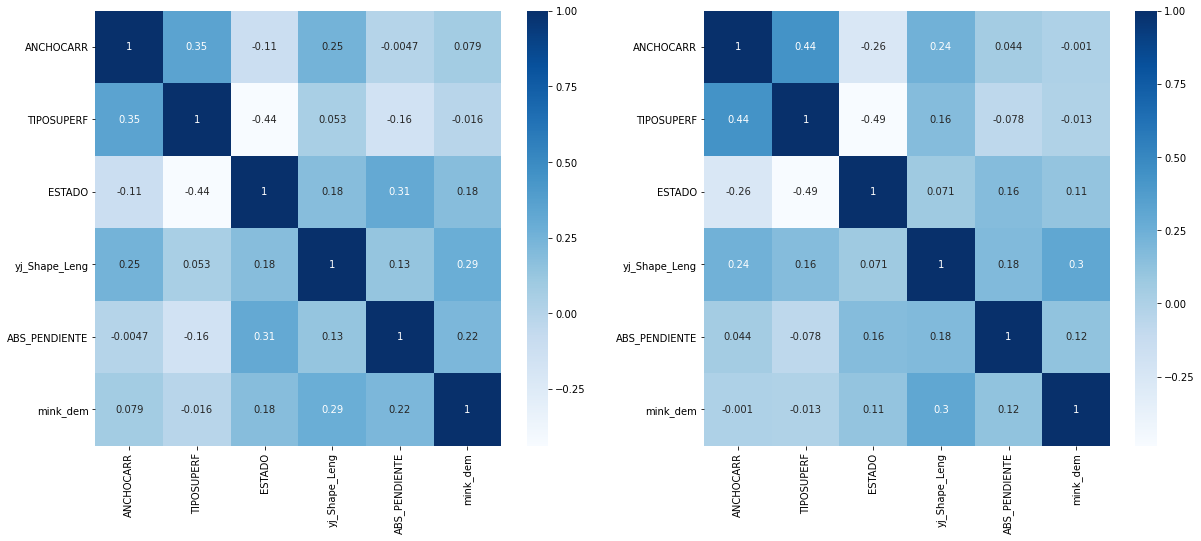

In [86]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
sns.heatmap(dfn_train.corr(), annot=True, cmap="Blues",ax=ax[0])
sns.heatmap(dfn_test.corr(), annot=True, cmap="Blues",ax=ax[1])

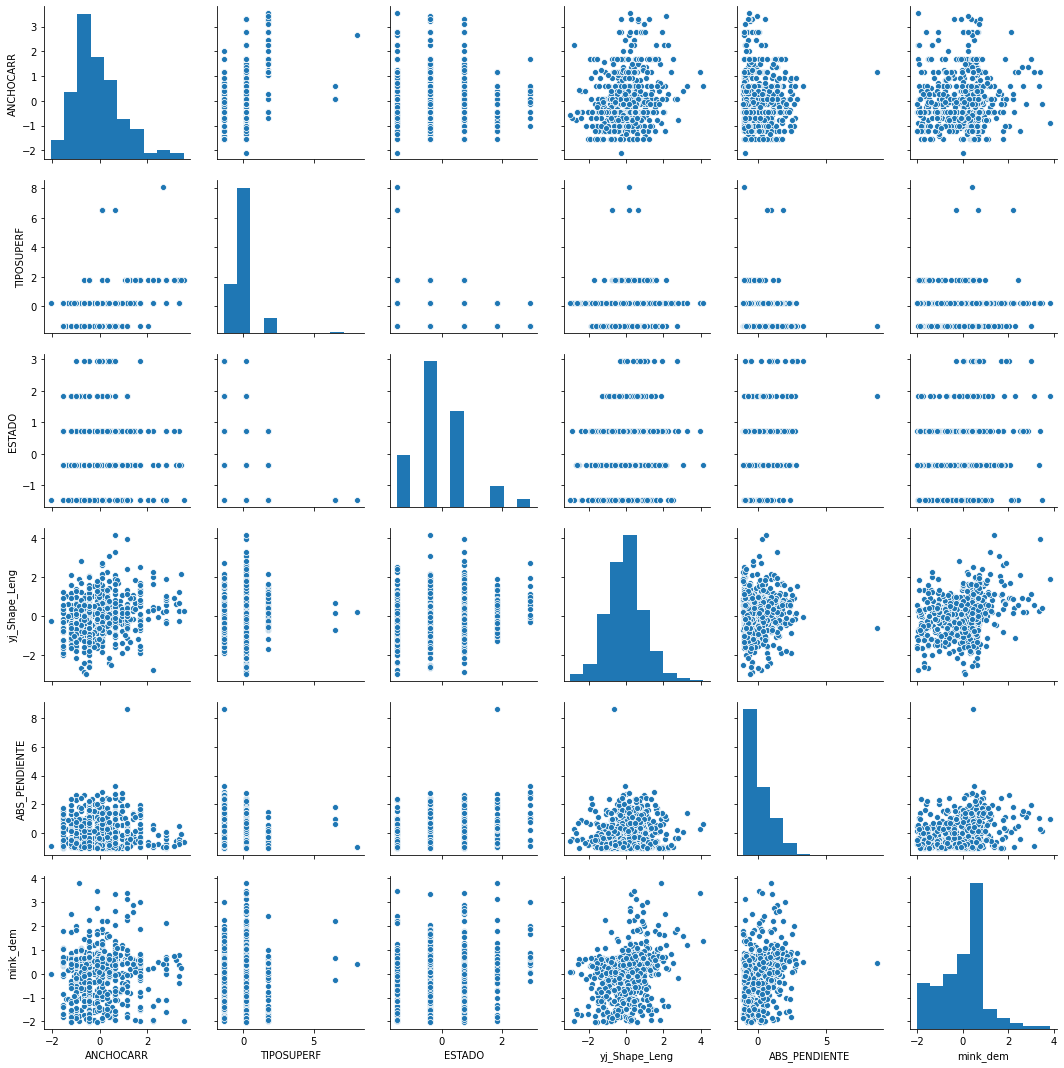

In [34]:
sns.pairplot(dfn_train)

# Division de los datos con y sin la variable de dimension fractal (mink_dem)

In [87]:
#Datos Sin variable de dimension fractal
var_sin_DF = ['ABS_PENDIENTE', 'yj_Shape_Leng']
dfn_train_sin= dfn_train[var_sin_DF]
dfn_test_sin= dfn_test[var_sin_DF]
#dfn_train_sin= dfn_train_1[var_sin_DF]
#dfn_test_sin= dfn_test_1[var_sin_DF]



#Datos Con variable de dimension fractal (mink_dem)
var_con_DF = ['ABS_PENDIENTE', 'mink_dem','yj_Shape_Leng']
dfn_train_DF= dfn_train[var_con_DF]
dfn_test_DF= dfn_test[var_con_DF]
#dfn_train_DF= dfn_train_1[var_con_DF]
#dfn_test_DF= dfn_test_1[var_con_DF]

# Clustering jerarquico

***SIN LA VARIABLE MINK_DEM***

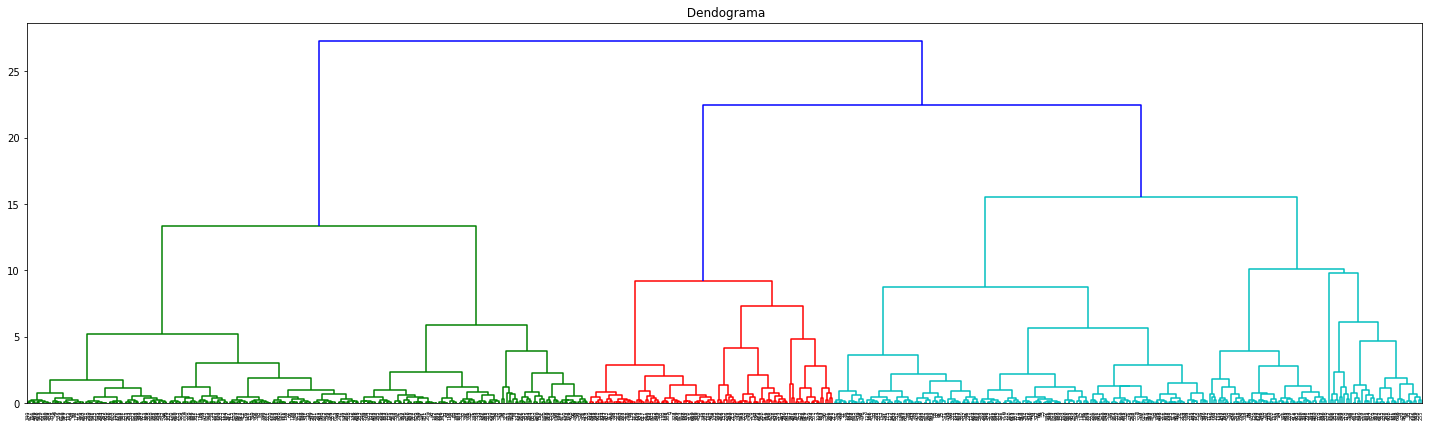

In [88]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 7))
plt.title(" Dendograma")
hc_sin =shc.linkage(dfn_train_sin.iloc[:9000,].values, method='ward')
dend_sin = shc.dendrogram(hc_sin)


In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hc_sin_labels_train = cluster.fit_predict(dfn_train_sin.iloc[:9000,])

# Se crea el Df de Resultados para almacenar los resultados de los algoritmos de agrupamientose agrega la columna con etiquetas de cluster al data frame
resultados_train = pd.DataFrame()
resultados_train = resultados_train.assign (hc_sin = hc_sin_labels_train)
#resultados_train.head()

In [90]:
try:
    hc_sin_labels_test = cluster.fit_predict(dfn_test_sin.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
    resultados_test = pd.DataFrame()
    resultados_test = resultados_test.assign (hc_sin = hc_sin_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***CON LA VARIABLE MINK_DEM***

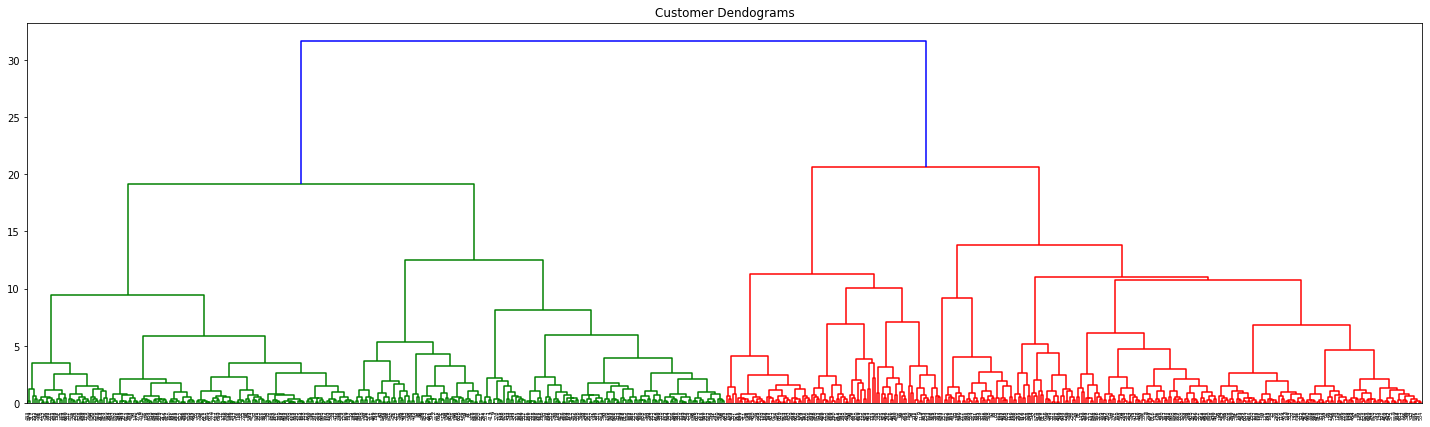

In [91]:
plt.figure(figsize=(25, 7))
plt.title("Customer Dendograms")
hc_DF =shc.linkage(dfn_train_DF.iloc[:9000,].values, method='ward')
dend_con = shc.dendrogram(hc_DF)


In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hc_DF_labels_train = cluster.fit_predict(dfn_train_DF.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
resultados_train = resultados_train.assign (hc_DF = hc_DF_labels_train)
#resultados_train.head()

In [93]:
try:
    hc_DF_labels_test = cluster.fit_predict(dfn_test_DF.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
    resultados_test = resultados_test.assign (hc_DF = hc_DF_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***Metricas en el Clustering jerarquico***

In [94]:
hc_sin_labels_train

array([2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,

In [95]:
hc_DF_labels_train

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0,

In [96]:
## https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
##https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
## Paper: Evaluation Metrics for Unsupervised Learning Algorithms


#Metricas

print('---------------------------\n','Validacion Externa (Matching) :\n','-------------------------- \n')
## Esternal validation - Matching sets
from sklearn.metrics import accuracy_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('accuracy Score: ',accuracy_score(hc_sin_labels_train, hc_DF_labels_train ))

from sklearn.metrics import precision_score   ##  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
print('precision Score: ', precision_score(hc_sin_labels_train, hc_DF_labels_train , average='weighted'))

print('---------------------------\n','Validacion Externa :\n','-------------------------- \n')
## Esternal validation - Peer to peer corelation
from sklearn.metrics import jaccard_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
print('jaccard_score: ',jaccard_score(hc_sin_labels_train, hc_DF_labels_train, average='weighted'))

from sklearn.metrics.cluster import fowlkes_mallows_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score
print('fowlkes_mallows_score (FMI): ',fowlkes_mallows_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn.metrics.cluster import adjusted_mutual_info_score #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score
print('adjusted_mutual_info_score (AMI): ',adjusted_mutual_info_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn.metrics.cluster import adjusted_rand_score
print('adjusted_rand_score (ARI): ',adjusted_rand_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn import metrics
print('Homogeneity, completeness and V-measure: ',metrics.homogeneity_completeness_v_measure(hc_sin_labels_train, hc_DF_labels_train))

###------
# Cuando no es conocida la variable de respuesta - Internal Validation
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth
print('---------------------------\n','Validacion Interna:\n','-------------------------- \n')

print('Silhouette Coefficient: - SIN',metrics.silhouette_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin, metric='euclidean'))
print('Silhouette Coefficient: - CON',metrics.silhouette_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF, metric='euclidean'))

print('Calinski-Harabasz Index -SIN: ',metrics.calinski_harabasz_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin))
print('Calinski-Harabasz Index - CON: ',metrics.calinski_harabasz_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF))

print('Davies-Bouldin index - SIN: ', metrics.davies_bouldin_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin))
print('Davies-Bouldin index: - CON', metrics.davies_bouldin_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF))

#Cohen’s kappa

---------------------------
 Validacion Externa (Matching) :
 -------------------------- 

accuracy Score:  0.19001610305958133
precision Score:  0.19415141198125638
---------------------------
 Validacion Externa :
 -------------------------- 

jaccard_score:  0.12958106249516624
fowlkes_mallows_score (FMI):  0.7130518541676624
adjusted_mutual_info_score (AMI):  0.46693759002934254
adjusted_rand_score (ARI):  0.5360498364071808
Homogeneity, completeness and V-measure:  (0.46100460828412665, 0.47652008039302135, 0.46863395845302386)
---------------------------
 Validacion Interna:
 -------------------------- 

Silhouette Coefficient: - SIN 0.33272384402590705
Silhouette Coefficient: - CON 0.24408333045929434
Calinski-Harabasz Index -SIN:  312.99671872546566
Calinski-Harabasz Index - CON:  192.36431999977268
Davies-Bouldin index - SIN:  1.016571030674186
Davies-Bouldin index: - CON 1.4440457702531433


<AxesSubplot:xlabel='hc_DF'>

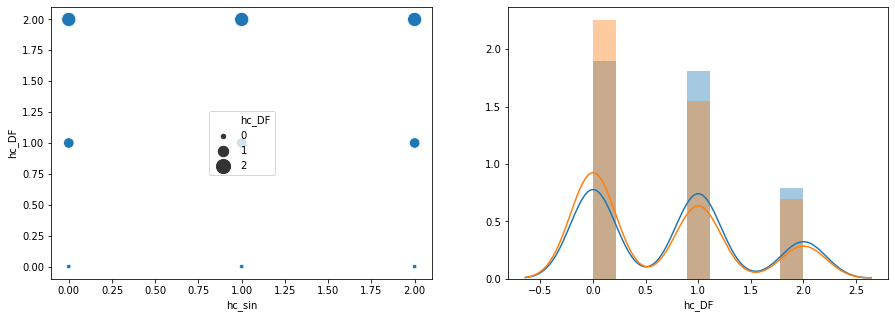

In [97]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data =resultados_train,x='hc_sin',y='hc_DF',ax=ax[0],size = 'hc_DF',sizes=(20, 200))
sns.distplot(resultados_train.hc_sin,ax=ax[1])
sns.distplot(resultados_train.hc_DF,ax=ax[1])

# Cluster - KMeans

***SIN LA VARIABLE MINK_DEM***

 Determinacion del Numero de Clusters  -Elbow Method

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



<function matplotlib.pyplot.show(close=None, block=None)>

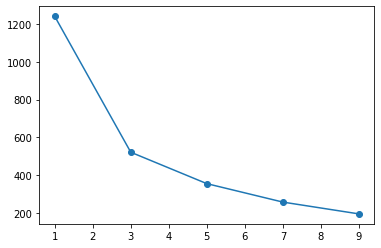

In [98]:
clusters_range = range(1,10,2)
inertias = []

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state = 0).fit(dfn_train_sin)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker = 'o')
plt.show


Ajuste del modelo a X clusters

In [99]:
kmeans = KMeans(init='k-means++',n_clusters=3,n_init=100,random_state = 1).fit(dfn_train_sin)
km_sin_labels_train = kmeans.labels_

resultados_train = resultados_train.assign (km_sin = km_sin_labels_train)
try:
    km_sin_labels_test = kmeans.predict(dfn_test_sin)
    resultados_test = resultados_test.assign (km_sin = km_sin_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***CON LA VARIABLE MINK_DEM***

 Determinacion del Numero de Clusters  -Elbow Method

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



<function matplotlib.pyplot.show(close=None, block=None)>

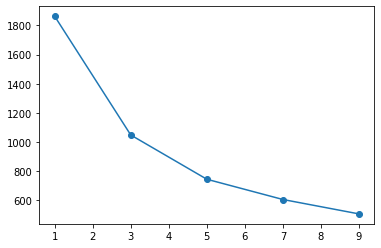

In [100]:
clusters_range = range(1,10,2)
inertias = []

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state = 0).fit(dfn_train_DF)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker = 'o')
plt.show

Ajuste del modelo a X clusters

In [101]:
kmeans = KMeans(init='k-means++',n_clusters=3,n_init=100,random_state = 1).fit(dfn_train_DF)
km_DF_labels_train = kmeans.labels_

resultados_train = resultados_train.assign (km_DF = km_DF_labels_train)

try:
    km_DF_labels_test = kmeans.predict(dfn_test_DF)
    resultados_test = resultados_test.assign (km_DF = km_DF_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***Metricas en el K means***

In [102]:
km_sin_labels_train

array([0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0,

In [103]:
km_DF_labels_train

array([2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2,

In [104]:
## https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
##https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
## Paper: Evaluation Metrics for Unsupervised Learning Algorithms


#Metricas

print('---------------------------\n','Validacion Externa (Matching) :\n','-------------------------- \n')
## Esternal validation - Matching sets
from sklearn.metrics import accuracy_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('accuracy Score: ',accuracy_score(km_sin_labels_train, km_DF_labels_train ))

from sklearn.metrics import precision_score   ##  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
print('precision Score: ', precision_score(km_sin_labels_train, km_DF_labels_train , average='weighted'))

print('---------------------------\n','Validacion Externa :\n','-------------------------- \n')
## Esternal validation - Peer to peer corelation
from sklearn.metrics import jaccard_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
print('jaccard_score: ',jaccard_score(km_sin_labels_train, km_DF_labels_train, average='weighted'))

from sklearn.metrics.cluster import fowlkes_mallows_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score
print('fowlkes_mallows_score (FMI): ',fowlkes_mallows_score(km_sin_labels_train, km_DF_labels_train))

from sklearn.metrics.cluster import adjusted_mutual_info_score #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score
print('adjusted_mutual_info_score (AMI): ',adjusted_mutual_info_score(km_sin_labels_train, km_DF_labels_train))

from sklearn.metrics.cluster import adjusted_rand_score
print('adjusted_rand_score (ARI): ',adjusted_rand_score(km_sin_labels_train, km_DF_labels_train))

from sklearn import metrics
print('Homogeneity, completeness and V-measure: ',metrics.homogeneity_completeness_v_measure(km_sin_labels_train, km_DF_labels_train))

###------
# Cuando no es conocida la variable de respuesta - Internal Validation
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth
print('---------------------------\n','Validacion Interna:\n','-------------------------- \n')

print('Silhouette Coefficient: - SIN',metrics.silhouette_score(dfn_train_sin, resultados_train.km_sin, metric='euclidean'))
print('Silhouette Coefficient: - CON',metrics.silhouette_score(dfn_train_DF, resultados_train.km_DF, metric='euclidean'))

print('Calinski-Harabasz Index -SIN: ',metrics.calinski_harabasz_score(dfn_train_sin, resultados_train.km_sin))
print('Calinski-Harabasz Index - CON: ',metrics.calinski_harabasz_score(dfn_train_DF, resultados_train.km_DF))

print('Davies-Bouldin index - SIN: ', metrics.davies_bouldin_score(dfn_train_sin, resultados_train.km_sin))
print('Davies-Bouldin index: - CON', metrics.davies_bouldin_score(dfn_train_DF, resultados_train.km_DF))

#Cohen’s kappa

---------------------------
 Validacion Externa (Matching) :
 -------------------------- 

accuracy Score:  0.3188405797101449
precision Score:  0.3198709738806546
---------------------------
 Validacion Externa :
 -------------------------- 

jaccard_score:  0.20792788151382546
fowlkes_mallows_score (FMI):  0.5180996482505763
adjusted_mutual_info_score (AMI):  0.32560747317369515
adjusted_rand_score (ARI):  0.26074461513783004
Homogeneity, completeness and V-measure:  (0.32779961434510313, 0.3274768163980963, 0.3276381358643035)
---------------------------
 Validacion Interna:
 -------------------------- 

Silhouette Coefficient: - SIN 0.37844983091501583
Silhouette Coefficient: - CON 0.279212786590172
Calinski-Harabasz Index -SIN:  426.97627567211987
Calinski-Harabasz Index - CON:  240.19113091244054
Davies-Bouldin index - SIN:  0.8894142953383176
Davies-Bouldin index: - CON 1.2599184767391876


<AxesSubplot:xlabel='km_DF'>

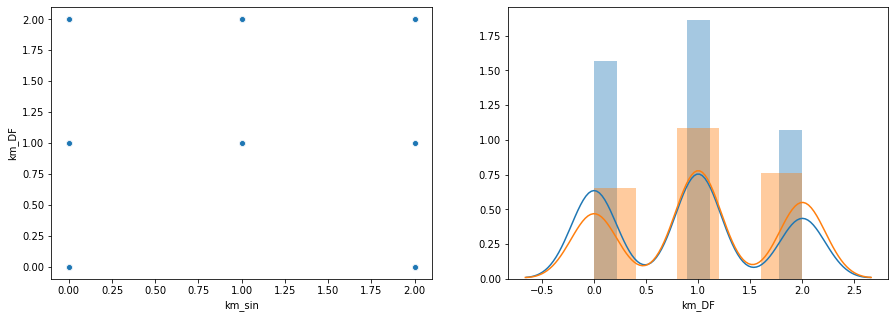

In [105]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data =resultados_train,x='km_sin',y='km_DF',ax=ax[0])
sns.distplot(resultados_train.km_sin,ax=ax[1])
sns.distplot(resultados_train.km_DF,ax=ax[1])

# ***DBSCAN***

***SIN LA VARIABLE MINK_DEM***

In [109]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.2, min_samples=2).fit(dfn_train_sin)
dbs_sin_labels_train = dbs.labels_

resultados_train = resultados_train.assign (dbs_sin = dbs_sin_labels_train)


try:
    dbs_sin_labels_test = dbs.fit_predict(dfn_test_sin)
    resultados_test = resultados_test.assign (dbs_sin = dbs_sin_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

In [110]:
dbs_sin_labels_test

array([ 0,  1,  1,  2, -1,  3,  4,  5,  6,  7, -1,  8,  7, -1,  6,  9, -1,
        6,  4, -1, 10,  2, -1,  4,  7, -1,  7, 11, 12, 13,  2, -1,  1,  2,
       13, 14, -1,  2, 14,  4, 15,  6, -1, 16, -1, -1,  6,  8, 15,  7,  4,
        1, 17, 14, 10, 13,  4,  2,  3, -1,  1,  0,  1,  6, -1, -1, 18, 12,
       -1,  7,  7,  6,  7,  5,  1,  4,  1, 18, 14, 11,  7, -1, -1,  6, -1,
       -1, 19,  9,  9,  7, -1,  7, 16,  2,  1,  2,  2, -1, 20, 20,  2, 12,
       10, 19,  2,  7,  2, -1, -1,  2,  6,  1,  4, -1, -1, 13, 11,  2, 13,
        6, 12,  2,  4, -1,  7, -1, 14,  6, -1,  4, 14,  6, 11, 20,  4, -1,
        2, -1, 13, 21, 12, 12,  7,  8, 12, 13, -1,  1,  0,  2, 11, -1,  4,
       21, 17,  1], dtype=int64)

In [113]:
resultados_test

,hc_sin,hc_DF,km_sin,km_DF,dbs_DF,dbs_sin
0,0,1,2,2,-1,0
1,1,1,0,1,-1,1
2,1,1,0,1,-1,1
3,0,0,1,1,-1,2
4,1,1,0,0,-1,-1
...,...,...,...,...,...,...
151,0,2,1,2,-1,-1
152,2,0,0,1,10,4
153,0,2,1,2,-1,21
154,0,2,1,1,-1,17


***CON LA VARIABLE MINK_DEM***

In [112]:
dbs = DBSCAN(eps=0.2, min_samples=2).fit(dfn_train_DF)
dbs_DF_labels_train = dbs.labels_

resultados_train = resultados_train.assign (dbs_DF = dbs_DF_labels_train)


try:
    dbs_DF_labels_test = dbs.fit_predict(dfn_test_DF)
    resultados_test = resultados_test.assign (dbs_DF = dbs_DF_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

# *** Union de los datos al DataFrame original!!*** 

In [114]:
print(df_train.shape)
print(resultados_train.shape)
print(df_test.shape)
print(resultados_test.shape)

(621, 22)
(621, 6)
(156, 22)
(156, 6)


In [125]:
a = df_train.append(df_test,ignore_index=True)
b = resultados_train.append(resultados_test,ignore_index=True)
c = pd.concat([a,b],axis=1)
print(type(a),a.shape,type(b),b.shape)
print(type(c),c.shape)

<class 'geopandas.geodataframe.GeoDataFrame'> (777, 22) <class 'pandas.core.frame.DataFrame'> (777, 6)
<class 'geopandas.geodataframe.GeoDataFrame'> (777, 28)


In [124]:
c.head()

,CODIGOVIA,FECHA,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,OBS,TIPOTERR,...,mink_dem,geometry,ABS_PENDIENTE,yj_Shape_Leng,hc_sin,hc_DF,km_sin,km_DF,dbs_DF,dbs_sin
0,MC10021,2017-10-18,400.983002,-0.10,3.0,0.0,0.0,0.0,None,4,...,0.904580,"LINESTRING Z (-73.01914 5.80469 2484.28270, -7...",0.10,5.914523,2,0,0,2,0,0
1,MC7337,2017-10-18,1263.979980,-0.33,5.5,0.0,0.0,0.0,None,4,...,0.885537,"LINESTRING Z (-73.07674 5.77743 2488.18930, -7...",0.33,7.026822,2,0,0,2,-1,1
2,MC10643,2017-10-18,46.025101,-0.56,3.0,0.0,0.0,0.0,None,3,...,0.862949,"LINESTRING Z (-73.11500 5.92952 3035.80200, -7...",0.56,3.816802,1,0,1,2,1,0
3,MC10687,2017-10-18,105.268997,4.07,2.7,0.0,0.0,0.0,None,3,...,0.983053,"LINESTRING Z (-73.05787 5.83445 2654.30600, -7...",4.07,4.616292,0,1,1,1,2,0
4,MC10642,2017-10-18,132.867004,-1.54,3.9,0.0,0.0,0.0,None,3,...,0.973809,"LINESTRING Z (-73.03440 6.01281 2678.35400, -7...",1.54,4.842146,1,0,1,1,3,0


<AxesSubplot:>

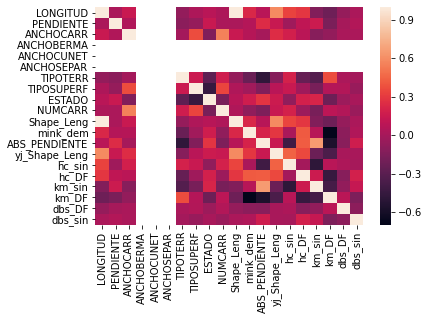

In [117]:
#sns.heatmap(clustered_data[clustered_data.Cluster == 4].corr())

#sns.heatmap(df_propiedades.corr())
sns.heatmap(c.corr())

In [1397]:
#sns.pairplot(c, hue = 'km_DF')

In [80]:
"""
fig,ax=plt.subplots(3,3,figsize=(20,10))

sns.scatterplot(x= 'Shape_Leng', y = 'ABS_PENDIENTE' , data =c, hue ='km_sin', ax=ax[0,0])
sns.scatterplot(x= 'Shape_Leng', y = 'TIPOSUPERF' , data =c, hue ='km_sin', ax=ax[0,1])
sns.scatterplot(x= 'Shape_Leng', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[0,2])
sns.scatterplot(x= 'Shape_Leng', y = 'mink_dem' , data =c, hue ='km_sin', ax=ax[1,0])
sns.scatterplot(x= 'ABS_PENDIENTE', y = 'TIPOSUPERF' , data =c, hue ='km_sin', ax=ax[1,1])
sns.scatterplot(x= 'ABS_PENDIENTE', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[1,2])
sns.scatterplot(x= 'TIPOSUPERF', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[2,2])
#"""

"\nfig,ax=plt.subplots(3,3,figsize=(20,10))\n\nsns.scatterplot(x= 'Shape_Leng', y = 'ABS_PENDIENTE' , data =c, hue ='km_sin', ax=ax[0,0])\nsns.scatterplot(x= 'Shape_Leng', y = 'TIPOSUPERF' , data =c, hue ='km_sin', ax=ax[0,1])\nsns.scatterplot(x= 'Shape_Leng', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[0,2])\nsns.scatterplot(x= 'Shape_Leng', y = 'mink_dem' , data =c, hue ='km_sin', ax=ax[1,0])\nsns.scatterplot(x= 'ABS_PENDIENTE', y = 'TIPOSUPERF' , data =c, hue ='km_sin', ax=ax[1,1])\nsns.scatterplot(x= 'ABS_PENDIENTE', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[1,2])\nsns.scatterplot(x= 'TIPOSUPERF', y = 'ESTADO' , data =c, hue ='km_sin', ax=ax[2,2])\n#"

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



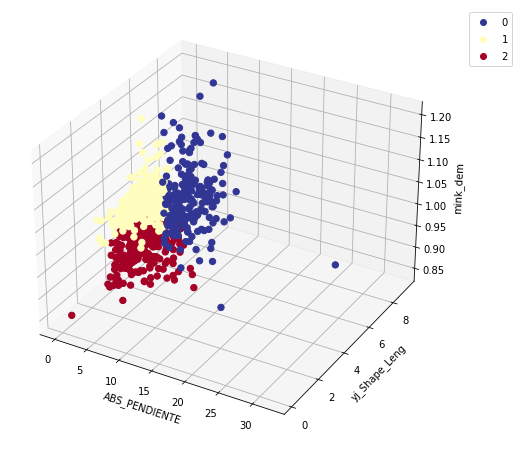

In [118]:
from mpl_toolkits.mplot3d import Axes3D


x = c['ABS_PENDIENTE']
y = c['yj_Shape_Leng']
z = c['mink_dem']
o = c['km_DF']
h = c['ESTADO']
t = c['TIPOTERR']

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')

ax.set_xlabel('ABS_PENDIENTE')
ax.set_ylabel('yj_Shape_Leng')
ax.set_zlabel('mink_dem')


sc = ax.scatter(x, y, z, s=40, c=o, marker='o', cmap='RdYlBu_r', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)



plt.show()

<AxesSubplot:xlabel='ABS_PENDIENTE', ylabel='mink_dem'>

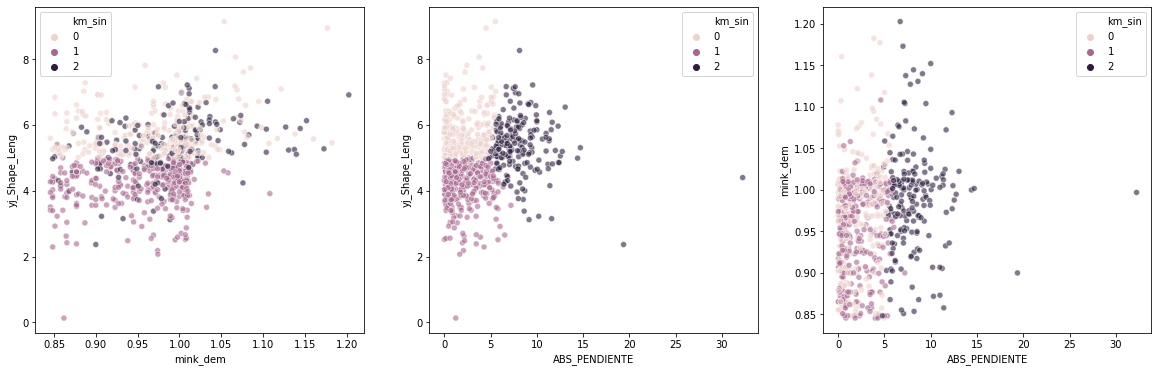

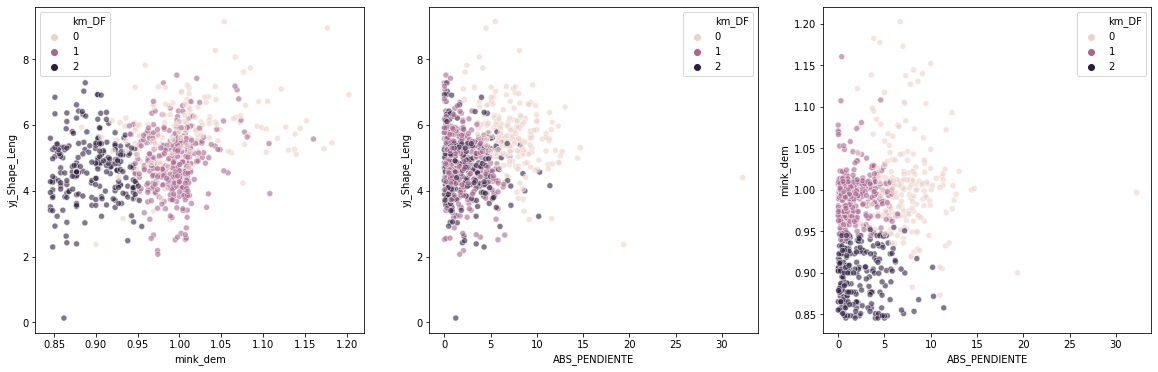

In [121]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(data= c, x ='mink_dem', y ='yj_Shape_Leng', hue = 'km_sin',ax=ax[0],  cmap='RdBu', alpha = 0.6)
sns.scatterplot(data= c, x ='ABS_PENDIENTE', y ='yj_Shape_Leng', hue = 'km_sin',ax=ax[1], cmap='RdYlBu_r', alpha = 0.6)
sns.scatterplot(data= c, x ='ABS_PENDIENTE', y ='mink_dem', hue = 'km_sin',ax=ax[2], alpha = 0.6)

fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(data= c, x ='mink_dem', y ='yj_Shape_Leng', hue = 'km_DF',ax=ax[0], cmap='RdYlBu_r', alpha = 0.6)
sns.scatterplot(data= c, x ='ABS_PENDIENTE', y ='yj_Shape_Leng', hue = 'km_DF',ax=ax[1], cmap='RdYlBu_r', alpha = 0.6)
sns.scatterplot(data= c, x ='ABS_PENDIENTE', y ='mink_dem', hue = 'km_DF',ax=ax[2], alpha = 0.6)

In [140]:
#fig = plt.figure(figsize = (20, 8))
#pd.plotting.parallel_coordinates( c, c.mink_dem )

fig = px.parallel_coordinates(c[['PENDIENTE','yj_Shape_Leng','mink_dem']], color=c.km_DF,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

# Interpretacion de los Cluster

In [132]:
c[c.km_sin==0].describe()
#clustered_data[c.hc_DF==0].describe()

,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng,hc_sin,hc_DF,km_sin,km_DF,dbs_DF,dbs_sin
count,265.000000,265.000000,265.000000,265.0,265.0,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.0,265.000000,265.000000,265.000000
mean,509.866721,0.378845,3.678113,0.0,0.0,0.0,3.622642,2.022642,2.226415,1.252830,519.243213,0.974731,2.054309,5.786115,1.230189,0.750943,0.0,1.113208,14.845283,1.686792
std,970.922820,2.631355,1.044508,0.0,0.0,0.0,0.634441,0.639200,0.798709,0.435457,969.904719,0.063103,1.682832,0.680949,0.814077,0.833853,0.0,0.658867,24.938459,4.169243
min,20.000000,-5.510000,2.000000,0.0,0.0,0.0,2.000000,1.000000,1.000000,1.000000,157.208571,0.845598,0.000000,5.005431,0.000000,0.000000,0.0,0.000000,-1.000000,-1.000000
25%,204.207001,-1.040000,3.000000,0.0,0.0,0.0,3.000000,2.000000,2.000000,1.000000,212.851791,0.932488,0.510000,5.299662,1.000000,0.000000,0.0,1.000000,-1.000000,0.000000
50%,271.114014,0.050000,3.500000,0.0,0.0,0.0,4.000000,2.000000,2.000000,1.000000,285.999738,0.988997,1.700000,5.586499,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
75%,469.412994,2.030000,4.300000,0.0,0.0,0.0,4.000000,2.000000,3.000000,2.000000,469.413163,1.009212,3.610000,6.067394,2.000000,2.000000,0.0,2.000000,16.000000,1.000000
max,11402.799805,5.550000,6.900000,0.0,0.0,0.0,4.000000,7.000000,5.000000,2.000000,11401.088075,1.182331,5.550000,9.143826,2.000000,2.000000,0.0,2.000000,83.000000,18.000000


<AxesSubplot:xlabel='km_DF', ylabel='mink_dem'>

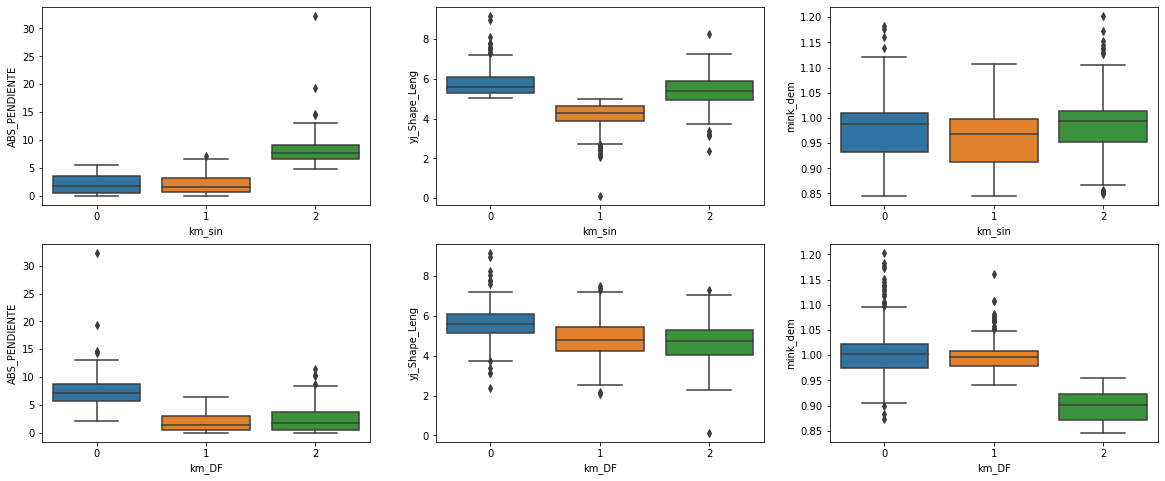

In [141]:
## LAS VARIABLES QUE SE ESTAN PINTANDO ESTAN NORMALIZADAS!!!!!!  -- REVISAR

fig,ax=plt.subplots(2,3,figsize=(20,8))
sns.boxplot(data = c, x = 'km_sin', y = 'ABS_PENDIENTE' ,ax=ax[0,0])
sns.boxplot(data = c, x = 'km_sin', y = 'yj_Shape_Leng' ,ax=ax[0,1])
sns.boxplot(data = c, x = 'km_sin', y = 'mink_dem' ,ax=ax[0,2])

sns.boxplot(data = c, x = 'km_DF', y = 'ABS_PENDIENTE' ,ax=ax[1,0])
sns.boxplot(data = c, x = 'km_DF', y = 'yj_Shape_Leng' ,ax=ax[1,1])
sns.boxplot(data = c, x = 'km_DF', y = 'mink_dem' ,ax=ax[1,2])

#sns.barplot(data = clustered_data, x = 'Cluster', y = 'TIPOSUPERF' ,ax=ax[1])
#sns.barplot(data = clustered_data, x = 'Cluster', y = 'ESTADO' ,ax=ax[2])


In [142]:
c.groupby(['km_DF']).mean().round(2)

,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng,hc_sin,hc_DF,km_sin,dbs_DF,dbs_sin
km_DF,,,,,,,,,,,,,,,,,,,
0,553.06,2.37,3.50,0.0,0.0,0.0,2.91,1.78,2.73,1.11,552.34,1.01,7.51,5.67,0.58,1.21,1.58,10.07,3.69
1,197.64,0.06,3.46,0.0,0.0,0.0,3.56,1.91,2.25,1.18,202.31,1.00,1.89,4.83,0.83,0.57,0.58,13.29,1.64
2,179.29,0.16,3.32,0.0,0.0,0.0,3.72,1.88,2.18,1.19,182.75,0.90,2.37,4.68,0.73,0.32,0.77,15.07,1.57


In [143]:
c.groupby(['km_DF']).std().round(2)

,LONGITUD,PENDIENTE,ANCHOCARR,ANCHOBERMA,ANCHOCUNET,ANCHOSEPAR,TIPOTERR,TIPOSUPERF,ESTADO,NUMCARR,Shape_Leng,mink_dem,ABS_PENDIENTE,yj_Shape_Leng,hc_sin,hc_DF,km_sin,dbs_DF,dbs_sin
km_DF,,,,,,,,,,,,,,,,,,,
0,1118.96,7.76,0.92,0.0,0.0,0.0,0.90,0.68,1.01,0.31,1116.75,0.06,3.04,0.93,0.80,0.42,0.82,22.48,6.72
1,242.85,2.49,0.98,0.0,0.0,0.0,0.75,0.63,0.85,0.39,244.50,0.03,1.62,0.90,0.73,0.76,0.51,21.89,4.00
2,217.89,3.24,0.90,0.0,0.0,0.0,0.53,0.59,0.81,0.40,225.61,0.03,2.22,0.97,0.68,0.64,0.60,23.86,4.29


In [ ]:
#Resutltados Totales
#c.to_file('C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\RESULTADOS\\Km_todo.shp')

In [144]:
#"""
c[c.km_DF==2].explore(  column="km_sin", # make choropleth based on "BoroName" column
     tooltip="mink_dem", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1" # use "Set1" matplotlib colormap
     #,style_kwds=dict(color="black") # use black outline
    )
#"""